cv.THRESH_BINARY

cv.THRESH_BINARY_INV

cv.THRESH_TRUNC

cv.THRESH_TOZERO

cv.THRESH_TOZERO_INV

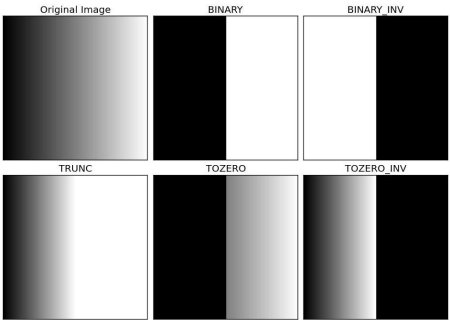

In [12]:
#threshold

import cv2
import numpy as np

def Thresholding(pos):
    retval, img_bin = cv2.threshold(img, pos, 255, cv2.THRESH_BINARY)
    #print(retval)
    cv2.imshow('Binary', img_bin)

img = cv2.imread('sakura.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2.namedWindow('Binary')
cv2.createTrackbar('threshold', 'Binary', 127, 255, Thresholding) 
cv2.imshow('Input', img)
cv2.imshow('Binary', img_bin)
cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
#threshold

import cv2
import numpy as np

def Thresholding(pos):
    retval, img_bin = cv2.threshold(img, pos, 255, cv2.THRESH_BINARY)
    #print(retval)
    cv2.imshow('Binary', img_bin)

img = cv2.imread('morphology.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2.namedWindow('Binary')
cv2.createTrackbar('threshold', 'Binary', 127, 255, Thresholding) 
cv2.imshow('Input', img)
cv2.imshow('Binary', img_bin)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
#automatic thresholding

import cv2
import numpy as np

img = cv2.imread('sakura.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_bin = cv2.threshold(img, 218, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) #cv2.THRESH_OTSU 自動找到最佳的 threshold
print(retval)
cv2.imshow('Input', img)
cv2.imshow('Binary', img_bin)
cv2.waitKey()
cv2.destroyAllWindows()

216.0


In [39]:
#morphological filter

import cv2
import numpy as np

img0 = cv2.imread('morphology.jpg', cv2.IMREAD_GRAYSCALE)
retval, img = cv2.threshold(img0, 200, 255, cv2.THRESH_BINARY_INV)#+cv2.THRESH_OTSU
print(retval)
#Square Kernel
kernel1 = np.ones((5, 5), np.uint8)
#Elliptical Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
# kernel = np.array(
#          [[0, 0, 1, 0, 0],
#           [1, 1, 1, 1, 1],
#           [1, 1, 1, 1, 1],
#           [1, 1, 1, 1, 1],
#           [0, 0, 1, 0, 0]], dtype=np.uint8)
print(kernel)
print(kernel1)
img_erosion = cv2.erode(img, kernel, iterations=1) #收縮
img_dilation = cv2.dilate(img, kernel, iterations=1) #擴張
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) #先收縮再擴張
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) #先擴張再收縮
cv2.imshow('Input_0', img0)
cv2.imshow('Input', img)
cv2.imshow('Erosion', img_erosion)
cv2.imshow('Dilation', img_dilation)
cv2.imshow('Opening', img_opening)
cv2.imshow('Closing', img_closing)
cv2.waitKey()
cv2.destroyAllWindows()

200.0
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [50]:
#connected component labeling

import cv2
import numpy as np

img = cv2.imread('morphology.jpg', cv2.IMREAD_GRAYSCALE)
ret, bin_img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
print(ret)
ret, labels = cv2.connectedComponents(bin_img)
print(np.max(labels))
# Map component labels to hue val
#In OpenCV, Hue range is [0,179]
label_hue = np.uint8(179*labels/np.max(labels)) # 將 H值 區分成 np.max(labels)個區塊
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

cv2.imshow('Input', img)
cv2.imshow('CCL', labeled_img)    
cv2.waitKey()
cv2.destroyAllWindows() 

200.0
7
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
?cv2.merge

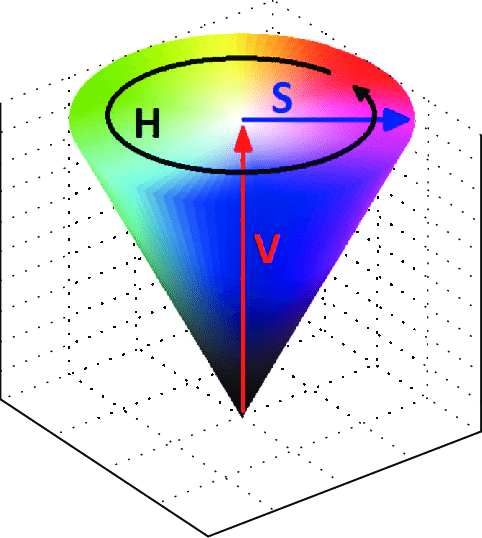

###### %%writefile test
## Practice (double thresholding)
1. Input images from video file WiiPlay.mp4 with the same level number as the last two digits of your student id.
2. Convert the image from BGR to HSV.
3. Use <i>cv2.createTrackbar()</i> to create two trackbars.
3. Use <i>cv2.getTrackbarPos()</i> to get the current value of each trackbar.
4. Use <i>cv2.inRange()</i> to perform double thresholding based on the Hue channel (find out pixels with Hue value between current values of two trackbars).
5. Show the output images.
6. Upload your Jupyter code file (*.ipynb)

In [2]:
import cv2
import numpy as np
    
# 讀取影片
# 選取檔案位置 
# Read image 
# Choise the image path
cap = cv2.VideoCapture('WiiPlay.mp4')

# Check if the video file is opened correctly
# 檢查影片檔案是否正確打開
if not cap.isOpened():
    raise IOError("Cannot open the video file")

# 設置開始、結束時間
# Set start and end time
start_time = 5
end_time = 13

fps = 30
frame_seq = start_time * fps # 計算開始的影格 # Calculate the starting frame
out_size = (640, 360)

# 使用 X264 編碼
# Use X264 encoding

#fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
def update(x):
    value1 = cv2.getTrackbarPos('threshold1', 'Binary')
    print(value1)

# 建立 VideoWriter 物件，輸出影片至 output.mp4
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, out_size)

# 第一個參數標誌 CAP_PROP_POS_FRAMES 是下一個要解碼/捕獲的幀的從 0 開始的索引。
# 第二個參數定義幀數，範圍從 0 到 (time_length*fps - 1)。
cap.set(cv2.CAP_PROP_POS_FRAMES , frame_seq);
cv2.namedWindow('Binary')
cv2.createTrackbar('threshold1', 'Binary', 104, 255, update)
cv2.createTrackbar('threshold2', 'Binary', 115, 255, update) 
# 建立計算影格的計數器
# Create a counter for counting frames
counter = start_time * fps
while True:
    ret, frame = cap.read()
    
    # 判斷結束時間
    # Judgment end time
    if ret == False  or counter == end_time* fps:
        break
    else:
        counter += 1 
    
    cur_frame = cv2.resize(frame, out_size, 0, 0, interpolation=cv2.INTER_AREA)

        
    hsv = cv2.cvtColor(cur_frame, cv2.COLOR_BGR2HSV)
    h = hsv[:,:,0]
   
    value1 = cv2.getTrackbarPos('threshold1', 'Binary')
    value2 = cv2.getTrackbarPos('threshold2', 'Binary') 
    mask = cv2.inRange(h,value1,value2)
    cur_frame[mask==0]=0
    cv2.imshow('Binary', cur_frame)
    out.write(cur_frame)
    
    c = cv2.waitKey(10)
    if c == 27:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()

104
104
106
101
99
97
95
90
87
83
80
78
76
75
73
71
69
68
66
64
68
73
76
80
85
90
97
104
114
121
128
135
141
146
153
158
163
168
173
177
179
182
186
187
191
